# 独立成分分析 ICA

在这个notebook上我们使用sklearn提供的ICA方法来提取混音文件，将混合的音频分离开来，本例子提供三个混音文件作为数据集合，分别是大提琴和钢琴的混合，大提琴和电视信号的混合，钢琴和电视信号的混合三个文件，那么我们看下如何分离它们，使其具有单独的大提琴，钢琴和电视信号三个独立的音频文件

In [3]:
import numpy as np
import wave
import warnings
warnings.filterwarnings('ignore')
#首先加载一个混音文件
mixed_audio_1 = wave.open('mixed_audio_1.wav','r')

我们从该 mixed_audio_1 文件中提取帧，这些帧将属于我们将运行 ICA 的数据集：

In [5]:
params = mix_1_wave.getparams()
nframes = params[3]
signal_1_raw = mix_1_wave.readframes(nframes)
signal_1 = np.frombuffer(signal_1_raw, dtype=np.int16)

signal_1 现在是一个整数列表，表示第一个文件中包含的声音。

如果将此数组绘制成线形图，我们将获得熟悉的波形

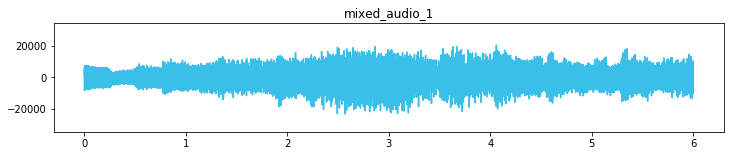

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

fs = mixed_audio_1.getframerate()
timing = np.linspace(0, len(signal_1)/fs, num=len(signal_1))


plt.figure(figsize=(12,2))
plt.title('mixed_audio_1')
plt.plot(timing,signal_1, c="#3ABFE8")
plt.ylim(-35000, 35000)
plt.show()

接下来我们按照相同的方式加载另外两个混音音频文件 mixed_audio_2.wav 和 mixed_audio_3.wav

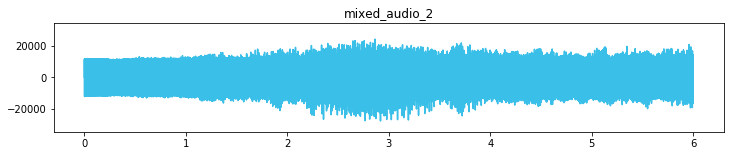

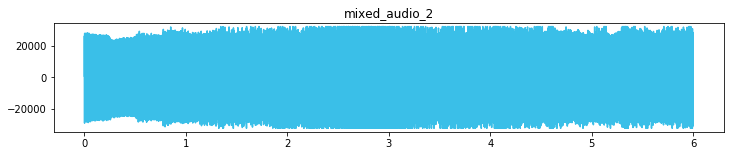

In [7]:
mix_2_wave = wave.open('mixed_audio_2.wav','r')

signal_raw_2 = mix_2_wave.readframes(-1)
signal_2 = np.fromstring(signal_raw_2, 'Int16')


mix_3_wave = wave.open('mixed_audio_3.wav','r')

signal_raw_3 = mix_3_wave.readframes(-1)
signal_3 = np.fromstring(signal_raw_3, 'Int16')


plt.figure(figsize=(12,2))
plt.title('mixed_audio_2')
plt.plot(timing,signal_2, c="#3ABFE8")
plt.ylim(-35000, 35000)
plt.show()


plt.figure(figsize=(12,2))
plt.title('mixed_audio_2')
plt.plot(timing,signal_3, c="#3ABFE8")
plt.ylim(-35000, 35000)
plt.show()

读取所有三个文件后，可以通过 [zip](https://docs.python.org/3/library/functions.html#zip) 运算创建数据集。

* 通过将 signal_1、signal_2 和 signal_3 组合成一个列表创建数据集 ```X```

In [8]:
X = list(zip(signal_1, signal_2, signal_3))

现在准备运行 ICA 以尝试获取原始信号。

* 导入 sklearn 的 [FastICA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FastICA.html) 模块
* 初始化 FastICA，查看三个成分
* 使用 fit_transform 对数据集 X 运行 FastICA 算法

In [9]:
from sklearn.decomposition import FastICA
transformer = FastICA(n_components=3,random_state=0)
ica_result = transformer.fit_transform(X)

我们将其拆分为单独的信号并查看这些信号

In [10]:
result_signal_1 = ica_result[:,0]
result_signal_2 = ica_result[:,1]
result_signal_3 = ica_result[:,2]

我们对分理出来的信号进行绘制，查看波浪线的形状

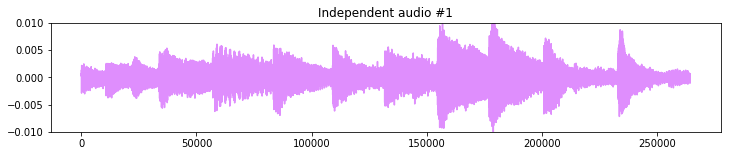

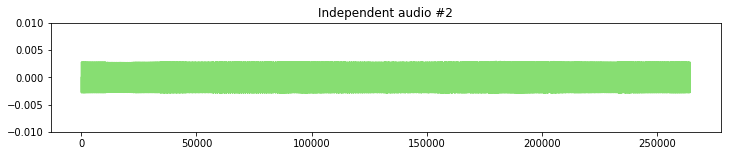

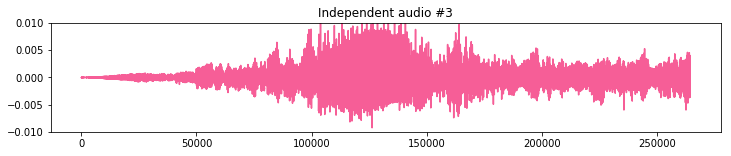

In [11]:
# 绘制独立音频 #1
plt.figure(figsize=(12,2))
plt.title('Independent audio #1')
plt.plot(result_signal_1, c="#df8efd")
plt.ylim(-0.010, 0.010)
plt.show()

# 绘制独立音频 #2
plt.figure(figsize=(12,2))
plt.title('Independent audio #2')
plt.plot(result_signal_2, c="#87de72")
plt.ylim(-0.010, 0.010)
plt.show()

# 绘制独立音频  #3
plt.figure(figsize=(12,2))
plt.title('Independent audio #3')
plt.plot(result_signal_3, c="#f65e97")
plt.ylim(-0.010, 0.010)
plt.show()

分离出来的音频波形图明显与之前混合音频的不同了，具备自己的独立特征,混合的波形图没有明显特征

将分离出来的音频数据保存下来

In [ ]:
from scipy.io import wavfile

# 将它们转换为整数（以便另存为 PCM 16 位 Wave 文件），否则只有某些媒体播放器能够播放它们
# 将值映射到 int16 音频的相应范围内。该范围在 -32768 到 +32767 之间。基本的映射方法是乘以 32767
# 音量有点低，我们可以乘以某个值（例如 100）来提高音量
result_signal_1_int = np.int16(result_signal_1*32767*100)
result_signal_2_int = np.int16(result_signal_2*32767*100)
result_signal_3_int = np.int16(result_signal_3*32767*100)


#保存文件
wavfile.write("Independent_audio_1.wav", fs, result_signal_1_int)
wavfile.write("Independent_audio_2.wav", fs, result_signal_2_int)
wavfile.write("Independent_audio_3.wav", fs, result_signal_3_int)